In [131]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def detect_circles(file_name, if_inner=False):
    img = cv2.imread(file_name)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray)
    plt.show()
    blurred = cv2.medianBlur(gray, 25) #cv2.bilateralFilter(gray,10,50,50)

    minDist = 200
    param1 = 30 #500
    param2 = 50 #200 #smaller value-> more false circles
    minRadius = 0
    maxRadius = 0 #10

    # docstring of HoughCircles: HoughCircles(image, method, dp, minDist[, circles[, param1[, param2[, minRadius[, maxRadius]]]]]) -> circles
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1, minDist, param1=param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius)
#     circles = cv2.HoughCircles(blurred,cv2.HOUGH_GRADIENT,1,60,param1=50,param2=30,minRadius=0,maxRadius=0)
#     circles = cv2.HoughCircles(blurred,cv2.HOUGH_GRADIENT,1,minDist,param1=50,param2=30,minRadius=0,maxRadius=0)

#     print('circles are ', circles)
    # Red color in BGR
#     color = (0, 0, 255)
    color = (255, 0, 0)
    # Line thickness of -1 px
    thickness = 10
  
    # Using cv2.circle() method
    # Draw a circle of red color of thickness -1 px
#     image = cv2.circle(image, center_coordinates, radius, color, thickness)

    if circles is not None:
        circles = np.uint16(np.around(circles))
        num = 0
        for i in circles[0,:]:
            print('i is ', i)
            num = num + 1
            cv2.circle(img, (i[0], i[1]), i[2], color, num)
            if if_inner:
                cv2.circle(img, (i[0], i[1]), i[2]-150, color, num * thickness)

    # Show result for testing:
    # cv2.imshow('img', img)
    plt.imshow(img)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

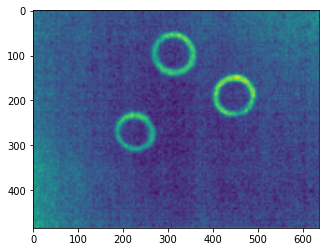

i is  [314  96  51]


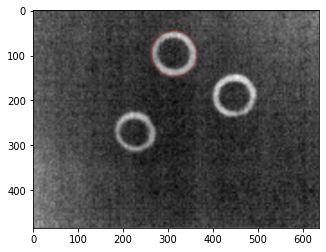

In [132]:
detect_circles('circle.png')

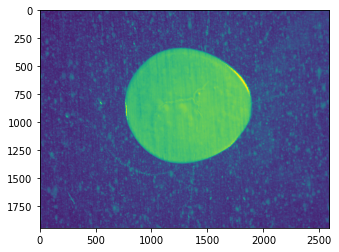

i is  [1286  852  524]
i is  [1500  836  388]


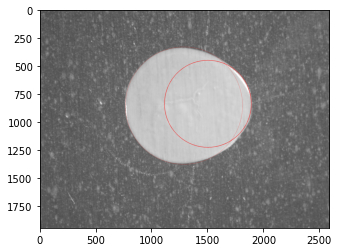

In [133]:
detect_circles('../data/raw/pc/220208b_C1.bmp')

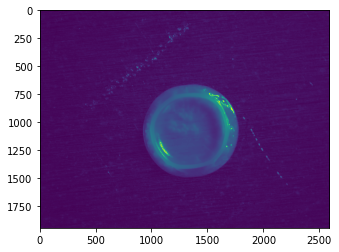

i is  [1338 1078  418]


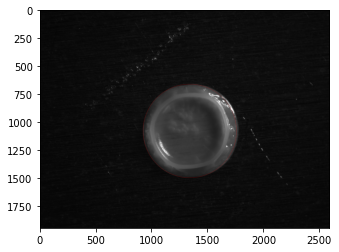

In [134]:
detect_circles('../data/raw/dn/DBM_50uL_70C_C1_a.bmp',False)